# Batch Normalization Using Einops
Ryan Roi Cayas\
2022-22085

In [ ]:
from einops import rearrange, repeat, reduce

import torchvision # for reading image files
import torch # for initializing tensors and verifying einops output
import matplotlib.pyplot as plt # for displaying images

In [ ]:
cat_tensor = torchvision.io.read_image("wonder_cat.jpg")
dog_tensor = torchvision.io.read_image("aki_dog.jpg")

catdog_tensor = torch.stack([cat_tensor, dog_tensor])

# Check dimensions
print("Cat Tensor Shape:", cat_tensor.shape)
print("Dog Tensor Shape:", dog_tensor.shape)
print("CatDog Tensor Shape:", catdog_tensor.shape)

Cat Tensor Shape: torch.Size([3, 224, 224])
Dog Tensor Shape: torch.Size([3, 224, 224])
CatDog Tensor Shape: torch.Size([2, 3, 224, 224])


Original images before batch normalization:



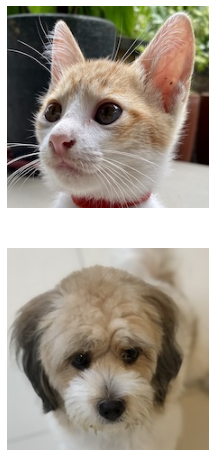

In [ ]:
# display image using matplotlib
print("Original images before batch normalization:\n")
catdog_array = rearrange(catdog_tensor,'b c h w -> b h w c').numpy() # rearrange dims and convert to numpy

_, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 8), dpi=72, sharex=True, sharey=True)
for i in range(len(ax)):
    ax[i].imshow(catdog_array[i]);
    ax[i].axis('off')

In [ ]:
###########################################
### EINOPS IMPLEMENTATION FOR BATCHNORM ###
###########################################

# calculate mean and stdev per channel
catdog_tensor_means = reduce(catdog_tensor/1.0, 'b c h w -> c', 'mean') # get channel means
print("Means per Channel: ", catdog_tensor_means)

catdog_tensor_sqmeans = reduce((catdog_tensor/1.0)**2, 'b c h w -> c', 'mean') # get channel means of the squares of elements
catdog_tensor_stdev = (catdog_tensor_sqmeans - catdog_tensor_means ** 2) ** 0.5
print("Standard Deviation per Channel: ", catdog_tensor_stdev)

# repeat means and stdev to match original tensor dimensions
catdog_tensor_means = repeat(catdog_tensor_means, "c -> b c h w", b = catdog_tensor.shape[0], h = catdog_tensor.shape[2], w = catdog_tensor.shape[3])
catdog_tensor_stdev = repeat(catdog_tensor_stdev, "c -> b c h w", b = catdog_tensor.shape[0], h = catdog_tensor.shape[2], w = catdog_tensor.shape[3])

# perform batch norm
catdog_tensor_batchnormed = (catdog_tensor - catdog_tensor_means)/(catdog_tensor_stdev + 1e-10)
print("\nCatDog Tensor Dimensions after Batch Norm: ", catdog_tensor_batchnormed.shape)

Means per Channel:  tensor([144.6647, 133.3523, 118.3058])
Standard Deviation per Channel:  tensor([59.6800, 58.9399, 60.3875])

CatDog Tensor Dimensions after Batch Norm:  torch.Size([2, 3, 224, 224])


In [ ]:
# verify mean and stdev after batchnorm
catdog_tensor_batchnormed_means = reduce(catdog_tensor_batchnormed, 'b c h w -> c', 'mean')
catdog_tensor_batchnormed_sqmeans = reduce(catdog_tensor_batchnormed**2, 'b c h w -> c', 'mean')
catdog_tensor_batchnormed_stdev = (catdog_tensor_batchnormed_sqmeans - catdog_tensor_batchnormed_means ** 2) ** 0.5

print("Mean per Channel after BatchNorm: ", catdog_tensor_batchnormed_means)
print("Stdev per Channel after BatchNorm: ", catdog_tensor_batchnormed_stdev)

Mean per Channel after BatchNorm:  tensor([ 1.1678e-07, -7.7851e-08, -5.3523e-08])
Stdev per Channel after BatchNorm:  tensor([1.0000, 1.0000, 1.0000])



Images after batch normalization:



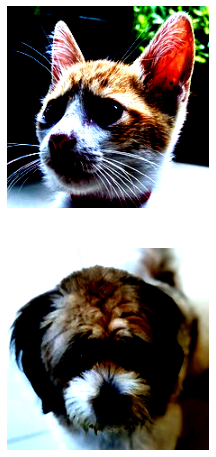

In [ ]:
# display image using matplotlib
print("\nImages after batch normalization:\n")
catdog_array_batchnormed = rearrange(catdog_tensor_batchnormed,'b c h w -> b h w c').numpy() # convert to numpy

_, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 8), dpi=72, sharex=True, sharey=True)
for i in range(len(ax)):
    ax[i].imshow(catdog_array_batchnormed[i]);
    ax[i].axis('off')

## Verifying the Batch Norm Output with Torch

In [ ]:
import torch.nn as nn

batch_norm = nn.BatchNorm2d(num_features=3)  # batchnorm layer for 2d image with 3 channels/features
catdog_tensor_batchnormed_torch = batch_norm(catdog_tensor/1.0)

# verify if output is same for einops and torch algos
print("Outputs for Einops and Torch BatchNorm Algos the same?")
torch.allclose(catdog_tensor_batchnormed, catdog_tensor_batchnormed_torch, atol=1e-8)

Outputs for Einops and Torch BatchNorm Algos the same?


True

We can confirm that the batch normalization algorithms using purely einops and using torch have similar outputs (tolerance 1e-8).


Images after batch normalization using TORCH:



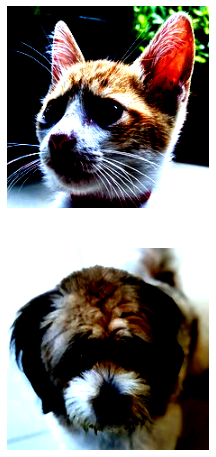

In [ ]:
# display image using matplotlib
print("\nImages after batch normalization using TORCH:\n")
catdog_array_batchnormed_torch = rearrange(catdog_tensor_batchnormed_torch,'b c h w -> b h w c').detach().numpy() # convert to numpy

_, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 8), dpi=72, sharex=True, sharey=True)
for i in range(len(ax)):
    ax[i].imshow(catdog_array_batchnormed_torch[i]);
    ax[i].axis('off')